# Método de Euler

#### Método numerico para ecuaciones de la forma $\frac{dy}{dx}=f(x,y)$ con condición inicial $y(x_0)=y_0$
Dada la condición inicial $y(x_0)=y_0$ y el tamaño de paso $\Delta x$, calculamos el punto $(𝑥_{𝑛+1},𝑦_{𝑛+1})$ a partir del punto precedente $(𝑥_𝑛,𝑦_𝑛)$ con los siguientes pasos:

1. Usamos la ecuación diferencial para determinar la pendiente $𝑓(𝑥_𝑛,𝑦_𝑛)$
2. Calculamos el siguiente punto $(𝑥_{𝑛+1},𝑦_{𝑛+1})$ mediante las fórmulas:
$$𝑥_{𝑛+1}=𝑥_𝑛+\Delta 𝑥$$
$$𝑦_{𝑛+1}=𝑦_𝑛+𝑓(𝑥_𝑛,𝑦_𝑛)\Delta 𝑥$$
$$𝑛=0,1,2,…$$

#### EJEMPLO Modelo de caida libre
Un objeto en caida libre se ve afectado escencialmente por dos fuerzas, la gravitacional $F_g=mg$ que provoca la caida del cuerpo, donde $m$ es la masa del cuerpo y $g$ es la acelaración de la gravedad en el punto de caida. La caida tambien se ve afecta por la fuerza de fricción $F_f=-cv$ que "frena" al cuerpo durante esta caida, donde $c$ es el coeficiente de arraste entendido como un factor de fricción y $v$ la velocidad de caida para el tiempo $t$. Debido a que el cuerpo se mueve podemos escribir la ecuación de movimiento como $ma=F_g+F_f$. Esta ecuación puede escirbirse como $m\frac{dv}{dt}=mg-cv$ rescrita como $\frac{dv}{dt}=g-\frac{c}{m}v$.

Para calcular una aproximación para todo punto $t$ de este modelo de caida libre a partir del método de Euler identificamos que la función $f(t,v)=f(v)=g-\frac{c}{m}v$. Por lo tanto esta ecuación diferencial cumple ser con una ecuación diferencial autonoma.

Consideremos la condición inicial $v(t_0)=v_0$, es decir al tiempo inicial $t_0$ la velocidad inicial es $v_0$. La función discretizada estaría dada por le ecuación $$v(t_{n+1})=v(t_n)+\left[g-\frac{c}{m}v(t_n)\right]\Delta t$$ 

Solución del ejercicio
Para resolver este problema numéricamente consideremos inicialmente $\Delta t=1$, $n=10$ pasos lo que implica que el tiempo máximo en nuestro modelo es $t_{max}=10$, la condición inicial $v(0)=0$, y los parámetros $c=12$, $m=68$ y $g=9.81$.

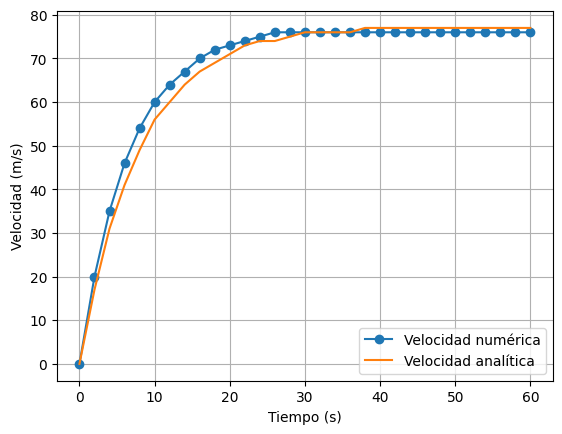

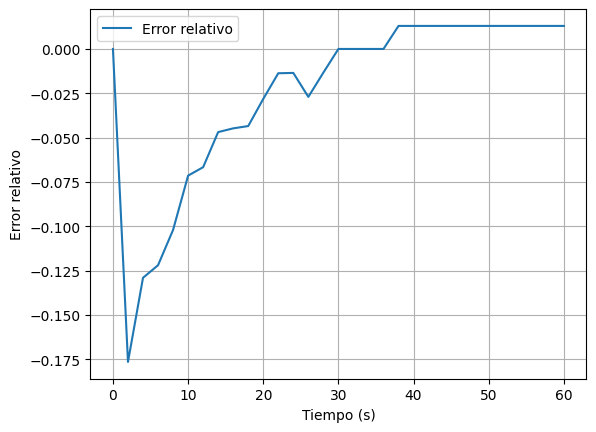

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definiciones de parámetros
g = 9.81  # aceleración de la gravedad promedio m/s^2
c = 12.7  # coeficiente de arrastre kg/s
m = 100   # masa en kg
dt = 2    # intervalo de tiempo en s
t_max = 60  # tiempo máximo de la simulación en s

# Condiciones iniciales
t = np.arange(0, t_max + dt, dt)
v = np.zeros(len(t))
v[0] = 0

# Cálculo de la velocidad
for i in range(len(t) - 1):
    v[i + 1] = round((g - (c / m * v[i])) * dt + v[i], 0)

# Graficar la velocidad calculada
plt.plot(t, v, '-o', label='Velocidad numérica')

# Solución analítica
v_ex = np.zeros(len(t))
v_ex[0] = 0
e_v = np.zeros(len(t))
e_v[0] = 0

for i in range(len(t) - 1):
    v_ex[i + 1] = round(g * m / c * (1 - np.exp(-c / m * t[i + 1])), 0)
    e_v[i + 1] = (v_ex[i + 1] - v[i + 1]) / v_ex[i + 1]

# Graficar la velocidad analítica
plt.plot(t, v_ex, label='Velocidad analítica')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el error relativo
plt.figure()
plt.plot(t, e_v, label='Error relativo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Error relativo')
plt.legend()
plt.grid(True)
plt.show()

#### EJEMPLO Modelo de (de)crecimiento poblacional

El problema de valor inicial dado por la ecuación diferencial $\frac{dy}{dt}=\pm ky$ con la condición incial $y(t_0)=y_0$ modela el (de)crecimiento poblacional. La característica de la reproducción (o la perdida) de esta población esta descrita por el parámetro $k$.

Para conocer la cantidad de elementos a un tiempo $t$ a partir de usar el método de Euler debemos discretizar esta ecuación identificamos que la función $f(t,y)=f(y)=\pm ky$. Por lo tanto, la ecuación diferencial discretizada queda de la forma $$y(t_{n+1})=y(t_n)+\left[\pm\, k\,y(t_n)\right]\Delta t$$

Si consideramos un tiempo máximo para la simulación de $t_{max}=10$ con un $\Delta t=.5$ entonces $n=1,...,20$

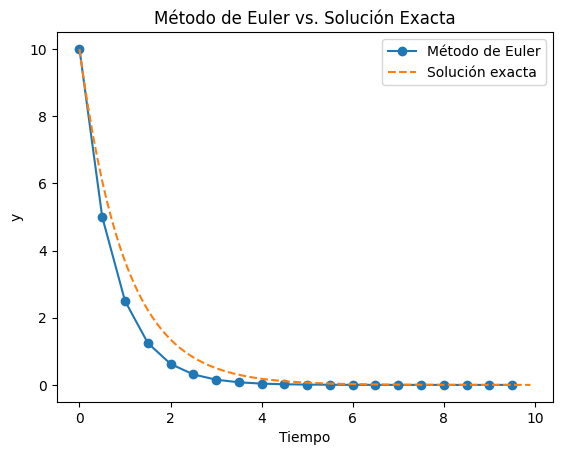

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
dt = .5   # Tamaño del paso
dte=0.1
t_max = 10  # Tiempo total

# Condición inicial
y0 = 10

# Discretización del tiempo
t = np.arange(0, t_max, dt)
t_ex = np.arange(0, t_max, dte)
N = len(t)

# Inicialización del array de soluciones
y = np.zeros(N)
y[0] = y0  # Valor inicial

# Aplicación del método de Euler
for i in range(1, N):
    y[i] = y[i-1] + dt * (-y[i-1])  # y' = -y
    # print(y[i])
# Solución exacta para comparar
y_exacta = y0 * np.exp(-t_ex)

# Graficar resultado
plt.plot(t, y, label="Método de Euler", marker="o")
plt.plot(t_ex, y_exacta, label="Solución exacta", linestyle="--")
plt.xlabel("Tiempo")
plt.ylabel("y")
plt.title("Método de Euler vs. Solución Exacta")
plt.legend()
plt.show()